In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [53]:
crimes_data= pd.read_csv('../data/Crimes_-_2001_to_Present.csv')
crimes_data.head()

/tmp/ipykernel_133132/95853385.py:1: DtypeWarning: Columns (0,8,9,19) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_data= pd.read_csv('../data/Crimes_-_2001_to_Present.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [72]:
crimes_data['zone'].head()

0    South
1     West
2    South
3    South
4    South
Name: zone, dtype: object

In [54]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658110 entries, 0 to 658109
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    658110 non-null  object 
 1   Case Number           658106 non-null  object 
 2   Date                  658106 non-null  object 
 3   Block                 658106 non-null  object 
 4   IUCR                  658106 non-null  object 
 5   Primary Type          658106 non-null  object 
 6   Description           658106 non-null  object 
 7   Location Description  654068 non-null  object 
 8   Arrest                658106 non-null  object 
 9   Domestic              658106 non-null  object 
 10  Beat                  658106 non-null  float64
 11  District              658105 non-null  float64
 12  Ward                  657913 non-null  float64
 13  Community Area        657929 non-null  float64
 14  FBI Code              658106 non-null  object 
 15  

In [55]:
crimes_data.describe()

,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Longitude
count,658106.000000,658105.000000,657913.000000,657929.000000,6.398720e+05,6.398720e+05,658106.000000,639871.000000
mean,1163.659369,11.318299,23.110428,36.821803,1.165080e+06,1.886385e+06,2018.986955,-87.669722
std,706.357902,7.040478,14.010394,21.627643,1.653831e+04,3.204021e+04,5.980384,0.060151
min,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,-91.686566
25%,612.000000,6.000000,10.000000,23.000000,1.153527e+06,1.858818e+06,2020.000000,-87.711697
50%,1033.000000,10.000000,23.000000,32.000000,1.166828e+06,1.891839e+06,2021.000000,-87.663452
75%,1731.000000,17.000000,34.000000,54.000000,1.176731e+06,1.909871e+06,2022.000000,-87.627105
max,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951503e+06,2023.000000,-87.524529


In [56]:
#Handling any inconsistensis of column names
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [57]:
#Check the data forany duplicates
crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [58]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a 
# combination of Latitude and Longitude
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)

In [59]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658110 entries, 0 to 658109
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  658106 non-null  object 
 1   block                 658106 non-null  object 
 2   iucr                  658106 non-null  object 
 3   primary_type          658106 non-null  object 
 4   description           658106 non-null  object 
 5   location_description  654068 non-null  object 
 6   arrest                658106 non-null  object 
 7   domestic              658106 non-null  object 
 8   beat                  658106 non-null  float64
 9   district              658105 non-null  float64
 10  ward                  657913 non-null  float64
 11  community_area        657929 non-null  float64
 12  fbi_code              658106 non-null  object 
 13  x_coordinate          639872 non-null  float64
 14  y_coordinate          639872 non-null  float64
 15  

<Axes: >

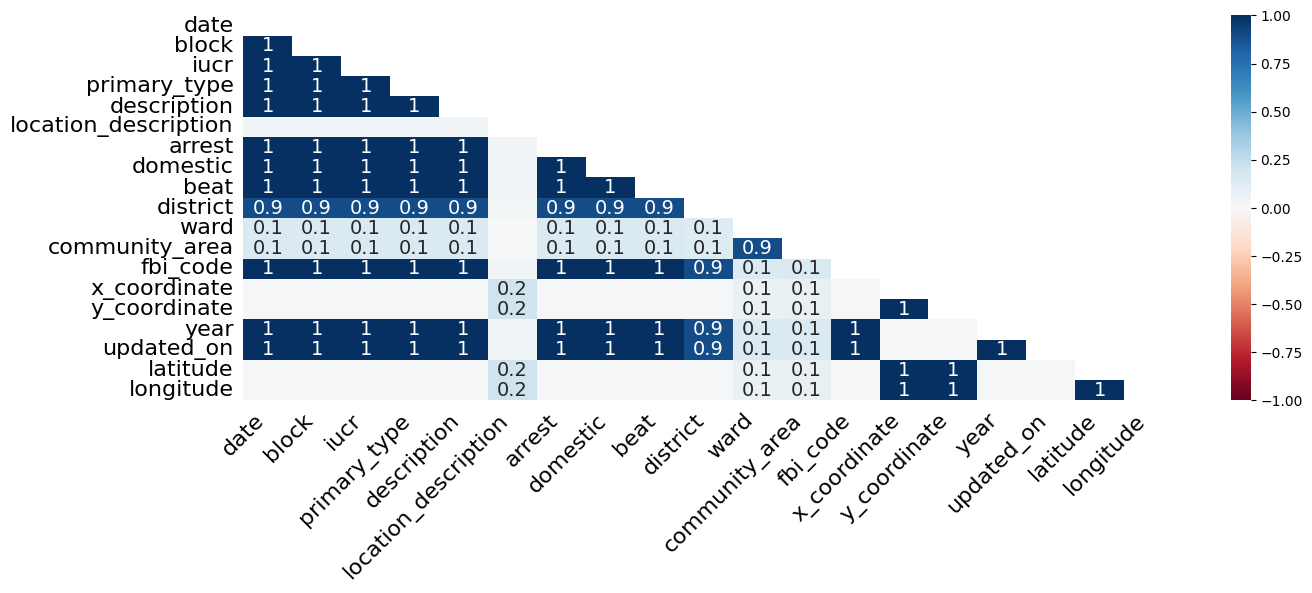

In [60]:
msno.heatmap(crimes_data,figsize=(15, 5))

<Axes: >

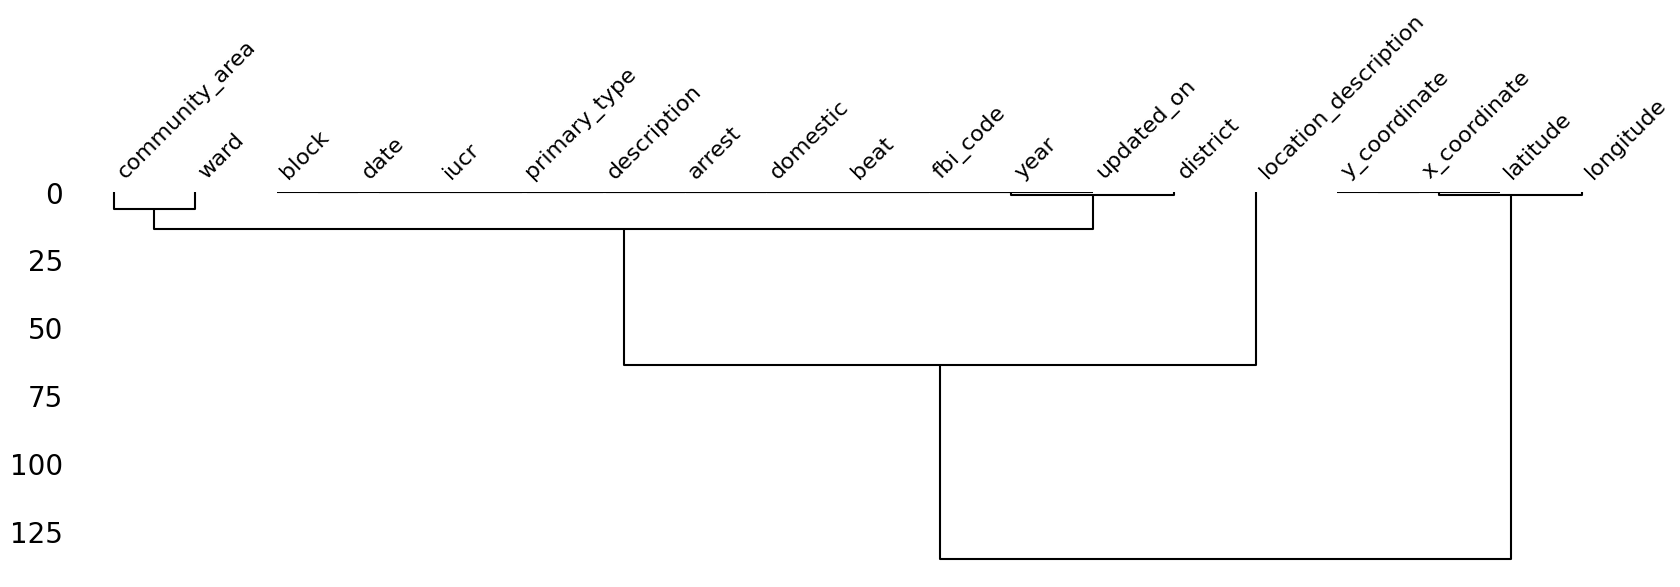

In [61]:
msno.dendrogram(crimes_data,figsize=(20,5))

As we can see from the above heatmap and dendogram that, the null values of latitude and longitude are highly co-ordinated with the x_coordinate and y_coordianate values respectively. A a co-relation of 1 here indicates that if any one of the value is missing the other one is also missing.

So we can safely remove observations where one of the values is zero. This should'nt affect our data and also limit the dropping of important observations.


In [63]:
crimes_data.isnull().sum()

date                        4
block                       4
iucr                        4
primary_type                4
description                 4
location_description     4042
arrest                      4
domestic                    4
beat                        4
district                    5
ward                      197
community_area            181
fbi_code                    4
x_coordinate            18238
y_coordinate            18238
year                        4
updated_on                  4
latitude                18238
longitude               18239
dtype: int64

In [64]:
#Dropping observations where latitude is null/Nan
crimes_data.dropna(subset=['latitude'],inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [65]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    2204
arrest                     0
domestic                   0
beat                       0
district                   1
ward                      61
community_area            41
fbi_code                   0
x_coordinate               0
y_coordinate               0
year                       0
updated_on                 0
latitude                   0
longitude                  1
dtype: int64

In [66]:
crimes_data.dropna(inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [67]:
crimes_data.isnull().sum()

date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
dtype: int64

In [14]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637601 entries, 0 to 637600
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  637601 non-null  object 
 1   block                 637601 non-null  object 
 2   iucr                  637601 non-null  object 
 3   primary_type          637601 non-null  object 
 4   description           637601 non-null  object 
 5   location_description  637601 non-null  object 
 6   arrest                637601 non-null  object 
 7   domestic              637601 non-null  object 
 8   beat                  637601 non-null  float64
 9   district              637601 non-null  float64
 10  ward                  637601 non-null  float64
 11  community_area        637601 non-null  float64
 12  fbi_code              637601 non-null  object 
 13  x_coordinate          637601 non-null  float64
 14  y_coordinate          637601 non-null  float64
 15  

In [68]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

In [69]:
crimes_data.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,day_of_week,month,time
0,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,212.0,2.0,...,06,1178180.0,1881621.0,2020.0,05/14/2020 08:47:15 AM,41.830482,-87.621752,Thursday,May,10
1,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,915.0,9.0,...,08B,1173292.0,1883705.0,2020.0,04/23/2020 03:45:11 PM,41.83631,-87.639624,Thursday,April,5
2,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,422.0,4.0,...,04A,1198234.0,1851595.0,2020.0,07/08/2020 03:41:45 PM,41.74761,-87.549179,Wednesday,July,10
3,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726.0,7.0,...,08B,1164812.0,1861251.0,2020.0,10/04/2020 03:43:55 PM,41.774878,-87.671375,Sunday,September,23
4,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712.0,7.0,...,04B,1170050.0,1863524.0,2005.0,02/28/2018 03:56:25 PM,41.781003,-87.652107,Sunday,July,15


In [70]:
#Mapping similar crimes under one group.
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [71]:
#Zone where the crime has occured
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [73]:
#Mapping seasons from month of crime
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [77]:
#Mapping similar locations of crime under one group.
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)


In [78]:
crimes_data.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,updated_on,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,0,0,212.0,2.0,...,05/14/2020 08:47:15 AM,41.830482,-87.621752,Thursday,May,10,THEFT,South,Spring,RESIDENCE
1,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,1,0,915.0,9.0,...,04/23/2020 03:45:11 PM,41.83631,-87.639624,Thursday,April,5,NON-CRIMINAL_ASSAULT,West,Spring,RESIDENCE
2,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,1,0,422.0,4.0,...,07/08/2020 03:41:45 PM,41.74761,-87.549179,Wednesday,July,10,NON-CRIMINAL_ASSAULT,South,Summer,PUBLIC_AREA
3,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,0,0,726.0,7.0,...,10/04/2020 03:43:55 PM,41.774878,-87.671375,Sunday,September,23,NON-CRIMINAL_ASSAULT,South,Fall,NaN
4,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,0,0,712.0,7.0,...,02/28/2018 03:56:25 PM,41.781003,-87.652107,Sunday,July,15,NON-CRIMINAL_ASSAULT,South,Summer,PUBLIC_AREA


In [83]:
#Mapping crimes to ints to get better information from plots
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)
crimes_data.latitude = crimes_data.latitude.astype('Float64')

In [84]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [85]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,0,0,212.0,2.0,3.0,35.0,2020.0,41.830482,-87.621752,Thursday,May,10,THEFT,South,Spring,RESIDENCE
1,1,0,915.0,9.0,11.0,60.0,2020.0,41.83631,-87.639624,Thursday,April,5,NON-CRIMINAL_ASSAULT,West,Spring,RESIDENCE
2,1,0,422.0,4.0,7.0,46.0,2020.0,41.74761,-87.549179,Wednesday,July,10,NON-CRIMINAL_ASSAULT,South,Summer,PUBLIC_AREA
3,0,0,726.0,7.0,15.0,67.0,2020.0,41.774878,-87.671375,Sunday,September,23,NON-CRIMINAL_ASSAULT,South,Fall,NaN
4,0,0,712.0,7.0,16.0,68.0,2005.0,41.781003,-87.652107,Sunday,July,15,NON-CRIMINAL_ASSAULT,South,Summer,PUBLIC_AREA


In [86]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637601 entries, 0 to 637600
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   arrest                637601 non-null  int64  
 1   domestic              637601 non-null  int64  
 2   beat                  637601 non-null  float64
 3   district              637601 non-null  float64
 4   ward                  637601 non-null  float64
 5   community_area        637601 non-null  float64
 6   year                  637601 non-null  float64
 7   latitude              637601 non-null  Float64
 8   longitude             637601 non-null  float64
 9   day_of_week           637601 non-null  object 
 10  month                 637601 non-null  object 
 11  time                  637601 non-null  int32  
 12  primary_type_grouped  634028 non-null  object 
 13  zone                  637601 non-null  object 
 14  season                637601 non-null  object 
 15  

In [87]:
# one-hot encoding
categorical_columns = ['day_of_week', 'month', 'primary_type_grouped', 'zone', 'season', 'loc_grouped']
crimes_data_encoded = pd.get_dummies(crimes_data_prediction, columns=categorical_columns, drop_first=True)


In [96]:
y = crimes_data_encoded['arrest'] 
X = crimes_data_encoded.drop(['arrest'], axis=1)

In [97]:
X.head()

,domestic,beat,district,ward,community_area,year,latitude,longitude,time,day_of_week_Monday,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,0,212.0,2.0,3.0,35.0,2020.0,41.830482,-87.621752,10,False,...,True,False,False,False,False,False,False,False,True,False
1,0,915.0,9.0,11.0,60.0,2020.0,41.83631,-87.639624,5,False,...,True,False,False,False,False,False,False,False,True,False
2,0,422.0,4.0,7.0,46.0,2020.0,41.74761,-87.549179,10,False,...,False,True,False,False,False,True,False,False,False,False
3,0,726.0,7.0,15.0,67.0,2020.0,41.774878,-87.671375,23,False,...,False,False,False,False,False,False,False,False,False,False
4,0,712.0,7.0,16.0,68.0,2005.0,41.781003,-87.652107,15,False,...,False,True,False,False,False,True,False,False,False,False


In [100]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [101]:
joblib.dump((X_train, y_train), '../data/training_crime_data.joblib')

['../data/training_crime_data.joblib']

In [102]:
joblib.dump((X_test, y_test), '../data/training_crime_data2.joblib')

['../data/training_crime_data2.joblib']